In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import random
base_path = 'F:\Study\weiboPredict\data'

origin = pd.read_csv(base_path + '\WeiboProfile.train',
                     index_col='w_id',
                     sep='\001',
                     encoding='utf-8',
                     quoting=3)
repo = pd.read_csv(base_path + '\\trainRepost.txt',
                   sep='\001',
                   encoding='utf-8',
                   quoting=3).fillna(value='', axis=1)

# 只取datetime中的time
origin.time = [t.time() for t in pd.to_datetime(origin.time)]

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


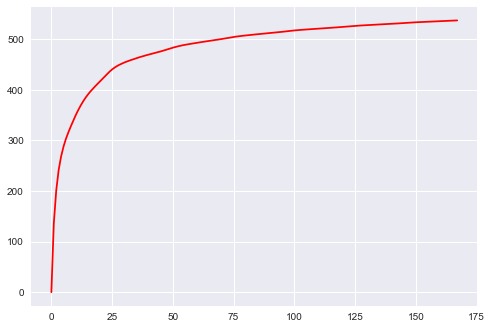

In [4]:
num = np.array([(repo['arrive_wt']<3600*n).sum() for n in range(0,168)])
plt.plot(range(0,168),num/origin.shape[0], 'r-')
plt.show()

In [42]:
# obsobservate size k
k = 75
t_columns = ['arrive_tt_' + str(i) for i in range(k)]+['max_interval_tt','mean_interval_tt','mean_interval_fhk_tt','mean_interval_lhk_tt']
features_t = pd.DataFrame(index=origin.index, columns=t_columns)
features_t.head()

,arrive_tt_0,arrive_tt_1,arrive_tt_2,arrive_tt_3,arrive_tt_4,arrive_tt_5,arrive_tt_6,arrive_tt_7,arrive_tt_8,arrive_tt_9,...,arrive_tt_67,arrive_tt_68,arrive_tt_69,arrive_tt_70,arrive_tt_71,arrive_tt_72,arrive_tt_73,arrive_tt_74,max_interval_tt,mean_interval_tt
w_id,,,,,,,,,,,,,,,,,,,,,
3794305741726764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3794545218812248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3794726233244929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3795261795455671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3795438593411753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
from scipy.ndimage.interpolation import shift

def extract_features_t(features_t,repo,k):
    arrive_tt = repo.arrive_tt[repo['w_id']==features_t.name].values[:k]
    interval_tt = arrive_tt - shift(arrive_tt,1,cval=0)
    features_t[:k]=arrive_tt
    features_t['max_interval_tt']=interval_tt.max()
    features_t['mean_interval_tt']=interval_tt.mean()
    features_t['mean_interval_fhk_tt'] = interval_tt[:math.ceil(k/2)].mean() # mean of first half k interval
    features_t['mean_interval_lhk_tt'] = interval_tt[math.ceil(k/2):].mean() # mean of last half k interval
    return  features_t

In [4]:
features_t = pd.read_csv(base_path + '\\features\\ppkr_75_features_t.csv',
                        index_col=['w_id'],
                        sep='\001',
                        encoding='utf-8',
                        quoting=3).reindex(origin.index)

In [5]:
features_t = features_t.apply(extract_features_t,axis=1,repo=repo,k=k)
features_t.describe()

,arrive_tt_0,arrive_tt_1,arrive_tt_2,arrive_tt_3,arrive_tt_4,arrive_tt_5,arrive_tt_6,arrive_tt_7,arrive_tt_8,arrive_tt_9,...,arrive_tt_67,arrive_tt_68,arrive_tt_69,arrive_tt_70,arrive_tt_71,arrive_tt_72,arrive_tt_73,arrive_tt_74,max_interval_tt,mean_interval_tt
count,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,...,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000,26008.000000
mean,6970.577399,7970.616887,8606.568556,9204.890303,9758.324708,10174.674985,10561.570709,10942.999539,11312.266149,11632.833590,...,28209.391495,28582.519033,28952.629076,29327.511343,29719.210166,30140.617233,30631.849662,31138.417102,12656.333282,415.178895
std,38746.266089,40605.322989,41831.537733,42817.058072,43890.415831,44382.675737,44831.440534,45330.638703,45922.698089,46332.990836,...,70529.831582,71122.673533,71729.188500,72392.526836,73059.387749,73813.333814,74689.770309,75780.575409,46516.822348,1010.407672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,6.000000,0.213333
25%,38.000000,64.000000,89.000000,112.000000,134.000000,153.000000,172.000000,195.000000,214.000000,233.000000,...,1424.000000,1446.000000,1465.000000,1491.000000,1513.000000,1536.000000,1561.000000,1587.000000,188.000000,21.160000
50%,96.000000,166.000000,230.000000,294.000000,348.000000,409.000000,467.000000,521.000000,582.000000,640.000000,...,4793.000000,4880.000000,4976.000000,5070.500000,5168.000000,5265.500000,5357.000000,5467.500000,662.000000,72.900000
75%,342.000000,611.000000,828.000000,1065.000000,1289.000000,1507.750000,1731.000000,1955.000000,2163.750000,2406.000000,...,18417.000000,18839.000000,19166.000000,19560.750000,19953.750000,20328.000000,20689.000000,21057.250000,3149.750000,280.763333
max,582606.000000,582619.000000,582638.000000,582638.000000,591746.000000,591765.000000,591816.000000,592037.000000,592063.000000,592063.000000,...,598169.000000,598175.000000,600358.000000,601353.000000,601474.000000,601554.000000,601606.000000,601746.000000,582606.000000,8023.280000


In [20]:
features_t.head()

,arrive_tt_0,arrive_tt_1,arrive_tt_2,arrive_tt_3,arrive_tt_4,arrive_tt_5,arrive_tt_6,arrive_tt_7,arrive_tt_8,arrive_tt_9,...,arrive_tt_69,arrive_tt_70,arrive_tt_71,arrive_tt_72,arrive_tt_73,arrive_tt_74,max_interval_tt,mean_interval_tt,mean_interval_fhk_tt,mean_interval_lhk_tt
w_id,,,,,,,,,,,,,,,,,,,,,
3920092313851132,28,92,128,166,211,278,288,304,352,774,...,231693,242405,267587,407252,505739,515715,139665,6876.200000,230.921053,13701.081081
3962375172043657,1155,2864,11744,11988,13040,19147,23540,36101,38079,42678,...,480454,498184,527226,565465,578724,600050,38493,8000.666667,4135.789474,11970.000000
3911730742829489,44,44,86,121,134,192,201,211,332,345,...,52781,70219,93011,93238,93363,189044,95681,2520.586667,118.052632,4988.054054
3800130211813476,28,480,854,4080,4301,4345,4352,4422,4483,4752,...,50038,50515,50768,68507,75708,131168,55460,1748.906667,585.789474,2943.459459
3898646783530058,464,3081,3318,3449,3715,5017,5181,5514,5693,5830,...,208911,236900,257897,258131,259980,260153,53447,3468.706667,2328.157895,4640.081081


In [21]:
features_t.to_csv(base_path + '\\features\\ppkr_75_features_t.csv',
                        index_label='w_id',
                        sep='\001',
                        encoding='utf-8',
                        quoting=3)

In [5]:
def put_label(X, label_num=5):
    sorted_X = np.sort(X)
    labels = np.zeros(X.shape)
    for i in reversed(range(1,label_num)):
        labels[X>=sorted_X[int(X.shape[0]*i/label_num)]]+=1
    return labels

In [5]:
def put_label_kmeans(X,label_num=5):
    from sklearn.cluster import KMeans
    x = np.vstack((X,X)).transpose()
    kmeans = KMeans(n_clusters=label_num).fit(x)
    labels = kmeans.predict(x)
    return  labels

In [12]:
labels = put_label(origin.repo_num_1w.values.transpose(),10)
origin['label'] = labels.transpose()
origin.describe()

,author_id,repo_num,repo_num_1w,label
count,2.600800e+04,26008.000000,26008.000000,26008.000000
mean,5.248943e+06,601.393648,556.651223,4.506152
std,2.384532e+06,416.247450,399.568963,2.867413
min,6.824000e+03,75.000000,75.000000,0.000000
25%,3.484453e+06,210.000000,193.000000,2.000000
50%,5.698817e+06,475.000000,416.000000,5.000000
75%,7.298946e+06,984.000000,922.000000,7.000000
max,8.379984e+06,1506.000000,1506.000000,9.000000


In [7]:
def test_classifier(clf,X,Y,test_size):
    from sklearn.cross_validation import train_test_split
    features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=test_size)
    from time import time
    from sklearn.metrics import accuracy_score
    
    print(str(clf))
    t0 = time()
    clf.fit(features_train,labels_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1 = time()
    pred = clf.predict(features_test)
    print ("predict time:", round(time()-t1, 3), "s")
    
    
    hit = accuracy_score(labels_test, pred,normalize = False)
     
    print ("test set size:", len(pred))
    print ("hit:",hit)
    print ("accuracy:",round(float(hit)/len(pred),5))
    print ('--------------------------------------------')
    return clf,features_test,labels_test

In [8]:
def test_regressor(regr,X,y,test_size):
    from sklearn.cross_validation import train_test_split
    features_train, features_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    from time import time
    
    
    print(str(regr))
    t0 = time()
    regr.fit(features_train,y_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1 = time()
    score = regr.score(features_test,y_test)
    print ("predict time:", round(time()-t1, 3), "s")
     
    print ("test set size:", len(y_test))
     
    print ("score:",score)
    print ('--------------------------------------------')
    return regr,features_test,y_test

In [13]:
# X = features_t.values
X = features_t.iloc[:,77:].values
# X = np.ones(26008).reshape(-1, 1)
Y = np.array(origin['label'].values)
y = origin.repo_num_1w.values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize


# X = normalize(X)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

pd.DataFrame(X).describe()

,0,1
count,26008.000000,26008.000000
mean,0.032130,0.019919
std,0.095024,0.064338
min,0.000000,0.000000
25%,0.001325,0.000891
50%,0.003899,0.003405
75%,0.014980,0.012510
max,1.000000,1.000000


In [15]:
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

lr = LogisticRegression(C=110,max_iter=10000,n_jobs=4,warm_start=False)
knn = KNeighborsClassifier(n_neighbors=300,p=2)
ada = AdaBoostClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(150,150),activation='relu',max_iter=1000,alpha=0.001,warm_start=False)

classifiers = [lr,knn,ada,mlp]
for c in classifiers:
    c = test_classifier(c,X,Y,0.2)

LogisticRegression(C=110, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


training time: 0.227 s
predict time: 0.023 s
test set size: 5202
hit: 901
accuracy: 0.1732
--------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=300, p=2,
           weights='uniform')
training time: 0.019 s


predict time: 0.859 s
test set size: 5202
hit: 1214
accuracy: 0.23337
--------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


training time: 0.84 s
predict time: 0.074 s
test set size: 5202
hit: 1185
accuracy: 0.2278
--------------------------------------------
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


training time: 10.174 s
predict time: 0.02 s
test set size: 5202
hit: 1194
accuracy: 0.22953
--------------------------------------------


In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
mlp = MLPRegressor(hidden_layer_sizes=(150,150),activation='relu',max_iter=1000,alpha=0.1)
ada = AdaBoostRegressor()
regrs = [mlp,ada]
for r in regrs:
    r = test_regressor(r,X,Y,0.2)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


training time: 8.25 s
predict time: 0.018 s
test set size: 5202
score: 0.443043795516
--------------------------------------------
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)


training time: 0.357 s
predict time: 0.007 s
test set size: 5202
score: 0.432188608596
--------------------------------------------
